## Otsu's Method

Here is the image from the first day, notebook number 1:

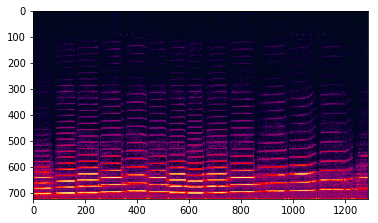

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('violin.png')
image = cv2.cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

The first step is to convert the image to grey. In order to do this, we have to do the following two operations:

- convert the color using cv2.COLOR_BGR2GRAY
- make surethe imshow cmap (colormap) parameter is set to gray

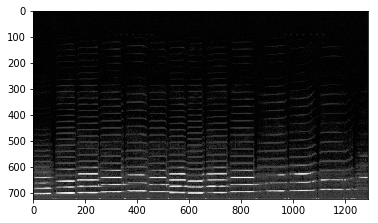

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

image = cv2.imread('violin.png')
# greyscale the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#defaults to colormap, so we can cmap to grey
plt.imshow(image, cmap='gray')
plt.show()

This is what happens when we apply Otsu's method to the image.

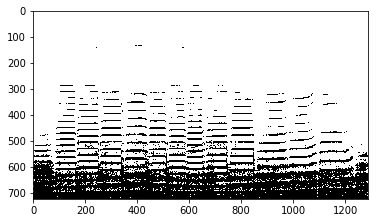

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

image = cv2.imread('violin.png')
# greyscale the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# need to add boolean ret to this, else there's an error. This has to do with the data type being returned.
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 

plt.imshow(image, cmap='gray')
plt.show()

Unfortunately, Otsu is confused. Our eyes are playing an optical illusion on us, and mistaking some pixels to be brighter than they actually are. The threshold that Otsu picks is not producing the expected result.

Other thresholding methods run into similar problems. Below, I've tried a few from the [OpenCV documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html):

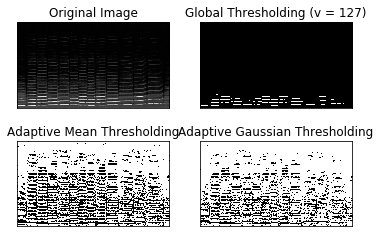

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('violin.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Indeed, the original image is probably the most useful one, but the vertical lines are lost when thresholding is applied due to the complexity of the colors involved.

If we remove the noise, as in the examples below, the images are better, but still don't achieve what we want.

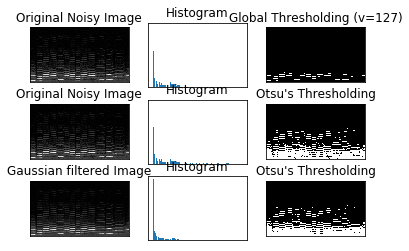

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('violin.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


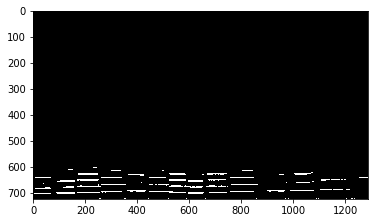

In [43]:
# The simplest case doesn't look good either


import cv2
import numpy as np
from matplotlib import pyplot as plt
  
image = cv2.imread('violin.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
ret, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
 
plt.imshow(blackAndWhiteImage, cmap='gray')

## Conclusion

It seems I may have overestimated the value of thresholding. I thought we could achieve a clear rendering in black and white, but the image is too distorted to have real value.

The median filter looks pretty good, but is it really more useful than the original image?